<a href="https://colab.research.google.com/github/imsewonyyy/AI-/blob/main/B_%EB%8F%85%EC%9D%BC%EC%8B%A0%EC%9A%A9%ED%8F%89%EA%B0%80_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import files
uploaded=files.upload()


Saving GermanCredit.csv to GermanCredit (2).csv


In [21]:
import pandas as pd
df=pd.read_csv("GermanCredit.csv")
df.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,0


# 1. 연습문제 / 과제풀이

## B: 21장 사례 21.2 (독일 신용평가 자료) 과제 풀기

먼저, 데이터 파일을 불러옵니다.

```python
from google.colab import files
uploaded = files.upload()



##1.
예측 변수를 검토하고 각 변수가 대출 결정에서 어떤 역할 하는지 생각해본다.데이터에 특이 사항이 있는가?


### 전체 예측 변수 해석


- `CHK_ACCT`: 당좌예금 계좌 상태  
      → 계좌 잔고가 높을수록 재정 안정성이 높다고 판단되어 신용등급에 긍정적으로 작용

- `DURATION`: 대출 기간  
      → 기간이 길수록 상환 위험이 증가하므로, 부정적 영향

- `HISTORY`: 신용경력
      → 연체 여부 및 과거 대출 상환 성실도 등을 반영하며, 양호할수록 신용도 증가

- `PURPOSE`: 대출 목적  
      → 생계, 교육 관련 목적은 긍정적 요인 / 소비성 목적은 상대적으로 낮은 신용평가 가능
- `AMOUNT`: 대출액  
      → 금액이 클수록 상환 부담 증가 → 위험요소로 작용 가능

- `SAV_ACCT`: 저축액  
      → 저축금액이 많을수록 재정 건전성 높다고 판단

- `EMPLOYMENT`: 현 직장 재직 기간
      → 근속 기간이 길수록 고정 소득이 있다있다고 판다하여 긍정적 영향

- `INSTALL_RATE`: 소득 대비 납입 비율
      → 소득 대비 부담이 높을 경우 부정적 영향
- `PERSONAL_STATUS`: 성별 및 결혼 상태  
      → 간접적인 경제적 배경을 반영할 수 있으나, 해석에 주의 필요

- `OTHER_PARTY`: 보증인 유무  
      → 보증인이 있을 경우 상환 보장성이 높아져 긍정적 평가 가능

- `RESIDENCE`: 거주 기간  
      → 거주 기간이 길수록 생활 안정성을 의미할 수 있음

- `PROPERTY`: 자산 소유 여부  
      → 부동산 또는 차량 소유 등은 재산 보유 지표로 신용에 긍정 작용

- `AGE`: 나이  
      → 일반적으로 나이가 많을수록 사회적 안정성이 높지만, 지나치게 많을 경우 소득 제한 가능성 있음

- `OTHER_INSTALL`:다른 분납 계획  
      → 추가적인 상환 부담이 될 수 있음 → 부정적 요인

- `HOUSING: 집 형태
      → 자가일 경우 경제적 안정성 판단 가능

- `NUM_CREDITS`:현재  대출 건수  
      → 대출 건수가 많을수록 신용위험 증가 가능

- `JOB`: 직업 유형  
      → 고정직/전문직일수록 소득 안정성 높게 평가됨

- `NUM_DEPENDENTS`: 부양가족 수  
      → 부양가족이 많을 경우 경제적 부담으로 작용 가능

- `TELEPHONE`: 전화 가입 여부  
      → 일정 수준 이상의 생활 인프라 보유 지표로 활용 가능

- `FOREIGN`: 외국인 여부  
      → 외국인일 경우 상환 추적의 어려움 등으로 보수적으로 평가될 수 있음
-'RESPONSE':우량 신용 여부
            
     → 외국인일 경우 상환 추적의 어려움 등으로 보수적으로 평가될 수 있음

### 데이터 특이 사항

1. **편중된 범주 분포**
   - 일부 범주형 변수(`PURPOSE`, `EMPLOYMENT`)는 특정 값에 관측값이 과도하게 집중되어 있음
    - 데이터 수집 당시 특정 소비 패턴이 강세였거나,대출 신청인들이 주로 소비성 지출을 위해 대출을 요청했다는 경향을 반영함,'EMPLOYMENT`는 1~4년 구간에 몰림

2. **수치형 변수의 분포 왜곡**
     - `AMOUNT`, `DURATION` 변수는 극단적인 고액/장기 대출 사례가 일부 포함되어 있어  
      분포가 비대칭 (right-skewed) 되어 있음

3. **불균형 클래스 문제**
      - `CREDITABILITY`(신용등급)의 클래스 비율이 불균형 편향되어 있음  
       → 모델 훈련 시 성능 왜곡 가능성 존재

4. **상관관계가 낮은 변수 다수**
      - 다수의 변수들이 `CREDITABILITY`와의 상관계수가 0.1 이하로 낮으며,  
        예측 기여도가 미미할 수 있음

5. **명목형 변수의 숫자 코드화**
      - 범주형 변수들이 숫자로 표현되어 있으나 순서가 없는 값이므로  
           모델 입력 시 One-hot encoding 등 전처리 필요

# 새 섹션

2.데이터를 학습용과 검증용으로 분할하고, 데이터 마이닝 기술(로지스틱 회귀 분석, 분류 트 리, 신경망)을 사용해 분류 모델들을 만들어보시오.

| 변수 유형     | 해당 변수                                                                                                                                                                                                                                          | 전처리 방법                              | 비고            |
| --------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------- | ------------- |
| ❌ 제거      | `OBS#`                                                                                                                                                                                                                                         | 열 삭제 (`drop`)                       | 식별자, 모델링에 불필요 |
| 🎯 타겟 변수  | `RESPONSE`                                                                                                                                                                                                                                     | 그대로 사용 (0:불량, 1:우수)                 | 예측 목표         |
| 🔢 수치형 변수 | `DURATION`, `AMOUNT`, `AGE`, `INSTALL_RATE`, `NUM_CREDITS`, `NUM_DEPENDENTS`                                                                                                                                                                   | `표준화 (StandardScaler)` 또는 `로그변환`    | 스케일 조정 필수     |
| 🔲 범주형 변수 | `CHK_ACCT`, `HISTORY`, `SAV_ACCT`, `EMPLOYMENT`, `PRESENT_RESIDENT`, `JOB`                                                                                                                                                                     | `One-hot encoding (pd.get_dummies)` | 순서 의미 없음      |
| ✅ 이진형 변수  | `NEW_CAR`, `USED_CAR`, `FURNITURE`, `RADIO/TV`, `RETRAINING`, `EDUCATION`, `MALE_DIV`, `MALE_SINGLE`, `MALE_MAR_WID`, `CO_APPLICANT`, `GUARANTOR`, `REAL_ESTATE`, `PROP_UNKN_NONE`, `OTHER_INSTALL`, `RENT`, `OWN_RES`, `TELEPHONE`, `FOREIGN` | 그대로 사용 (0/1)                        | 이미 정제된 이진 값   |


데이터 전처리

수정 전 코드

In [22]:
# 불필요한 열 제거 (예: OBS#)
if 'OBS#' in df.columns:
 df = df.drop('OBS#', axis=1)
# 데이터 분할
from sklearn.model_selection import train_test_split
X = df.drop('RESPONSE', axis=1)
y = df['RESPONSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42, stratify=y)
# 특성 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

수정 후

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv("GermanCredit.csv")

# 불필요한 열 제거 (예: OBS#)
if 'OBS#' in df.columns:
    df = df.drop('OBS#', axis=1)

# 범주형 변수 one-hot encoding 및 첫번째 범주 제거(다중공선성)
categorical_cols = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 데이터 분할
X = df.drop('RESPONSE', axis=1)
y = df['RESPONSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 특성 스케일링 (수치형 변수만)
scaler = StandardScaler()
numeric_cols = ['DURATION', 'AMOUNT', 'AGE', 'INSTALL_RATE', 'NUM_CREDITS', 'NUM_DEPENDENTS']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 데이터 확인
print(X_train.head())


     DURATION  NEW_CAR  USED_CAR  FURNITURE  RADIO/TV  EDUCATION  RETRAINING  \
328  1.217731        0         0          0         1          0           0   
891 -0.492631        0         0          0         1          0           0   
255  3.172429        0         0          0         1          0           0   
243 -0.736968        0         0          0         0          0           1   
492 -1.225643        0         0          0         1          0           0   

       AMOUNT  INSTALL_RATE  MALE_DIV  ...  EMPLOYMENT_1  EMPLOYMENT_2  \
328  0.440600      0.909865         0  ...         False         False   
891 -0.501243      0.909865         0  ...         False         False   
255  1.489665     -1.766209         0  ...         False          True   
243 -0.730649      0.017840         0  ...         False          True   
492 -0.712125     -1.766209         0  ...         False          True   

     EMPLOYMENT_3  EMPLOYMENT_4  PRESENT_RESIDENT_2  PRESENT_RESIDENT_3  \

로지스틱 회귀 모델 훈련

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# 로지스틱 회귀 모델 정의 및 훈련
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
# 기본 예측
y_pred = logreg.predict(X_test_scaled)
# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"정확도: {accuracy:.4f}")
print(f"혼동 행렬:\n{cm}")
print(f"분류 보고서:\n{report}")


정확도: 0.7567
혼동 행렬:
[[ 44  46]
 [ 27 183]]
분류 보고서:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55        90
           1       0.80      0.87      0.83       210

    accuracy                           0.76       300
   macro avg       0.71      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300



TP (183): 우수한 고객을 맞게 예측한 경우 👍

FP (46): 신용 불량자인데 잘못 우수하다고 예측 → 은행 입장에서 큰 손실

FN (27): 우수 고객을 놓침 → 기회손실이지만 손해는 적음

TN (44): 불량 고객을 맞게 거절한 경우

📌 클래스 0 (신용 불량자)
정밀도 0.62: 불량이라고 예측한 사람 중 실제 불량은 62%

재현율 0.49: 실제 불량자 중 49%만 잘 맞춤 → 많이 놓침 (FN 큼)

F1-score 0.55: 불량 예측이 비교적 부정확

📌 클래스 1 (신용 우수자)
정밀도 0.80: 우수하다고 예측한 사람 중 80%는 실제 우수 → 비교적 안정적

재현율 0.87: 실제 우수자 중 87% 맞춤 → 대부분 잘 잡음

F1-score 0.83: 우수자에 대한 예측은 매우 양호
[[ TN  FN]
 [ FP TP]]

Confusion Matrix 혼동행렬 시각화

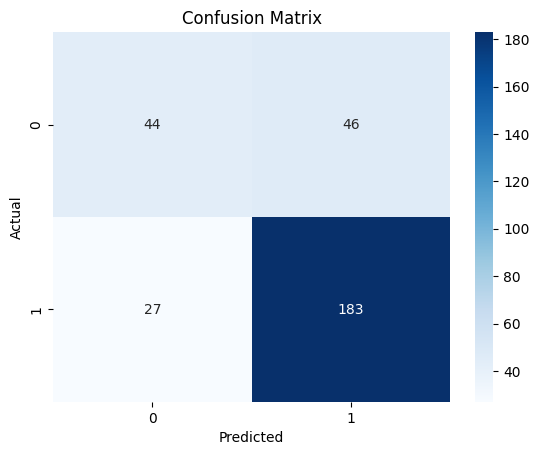

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


분류트리 모델

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 분류트리 모델 정의 및 훈련
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

# 기본 예측
y_pred_tree = tree.predict(X_test_scaled)

# 성능 평가
accuracy_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f"[분류트리] 정확도: {accuracy_tree:.4f}")
print(f"[분류트리] 혼동 행렬:\n{cm_tree}")
print(f"[분류트리] 분류 보고서:\n{report_tree}")


신경망 모델

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 신경망 모델 정의 및 훈련
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train_scaled, y_train)

# 기본 예측
y_pred_nn = nn.predict(X_test_scaled)

# 성능 평가
accuracy_nn = accuracy_score(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print(f"[신경망] 정확도: {accuracy_nn:.4f}")
print(f"[신경망] 혼동 행렬:\n{cm_nn}")
print(f"[신경망] 분류 보고서:\n{report_nn}")


비용/이익 행렬 설정 및 각 모델 총 이익 비교

In [29]:
import numpy as np

# 비용/이익 행렬 정의 (정답 구조)
cost_benefit_matrix = np.array([
    [0, -500],   # 실제 Bad(0): 예측 Bad(0), 예측 Good(1)
    [-100, 0]    # 실제 Good(1): 예측 Bad(0), 예측 Good(1)
])

# ▷ 로지스틱 회귀
cm_logreg = confusion_matrix(y_test, y_pred)
profit_logreg = np.sum(cm_logreg * cost_benefit_matrix)

# ▷ 분류트리
cm_tree = confusion_matrix(y_test, y_pred_tree)
profit_tree = np.sum(cm_tree * cost_benefit_matrix)

# ▷ 신경망
cm_nn = confusion_matrix(y_test, y_pred_nn)
profit_nn = np.sum(cm_nn * cost_benefit_matrix)

# 🔽 결과 비교 출력
print("[로지스틱 회귀] 혼동 행렬:\n", cm_logreg)
print(f"[로지스틱 회귀] 총 이익: {profit_logreg}\n")

print("[분류트리] 혼동 행렬:\n", cm_tree)
print(f"[분류트리] 총 이익: {profit_tree}\n")

print("[신경망] 혼동 행렬:\n", cm_nn)
print(f"[신경망] 총 이익: {profit_nn}")


[로지스틱 회귀] 혼동 행렬:
 [[ 44  46]
 [ 27 183]]
[로지스틱 회귀] 총 이익: -25700

[분류트리] 혼동 행렬:
 [[ 37  53]
 [ 46 164]]
[분류트리] 총 이익: -31100

[신경망] 혼동 행렬:
 [[ 40  50]
 [ 33 177]]
[신경망] 총 이익: -28300


총 이익은 로지스틱 회귀가 -25700으로 가장 높다